In [1]:
import os
import numpy as np

from cycler import cycler # for cycling linestyles and colors in the plot 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # for inset plotting

## I. `pw.x scf` convergence

In [2]:
i_rhocut_energies = np.loadtxt('rhocutoff/energies_rhocut.dat')
i_wfclower_energies = np.loadtxt('rhocutoff/wfclower/i_wfclower_energies.dat')

i_rhocut_energies[:,0] = i_rhocut_energies[:,0]*4 # convert ecutwfc to ecutrho

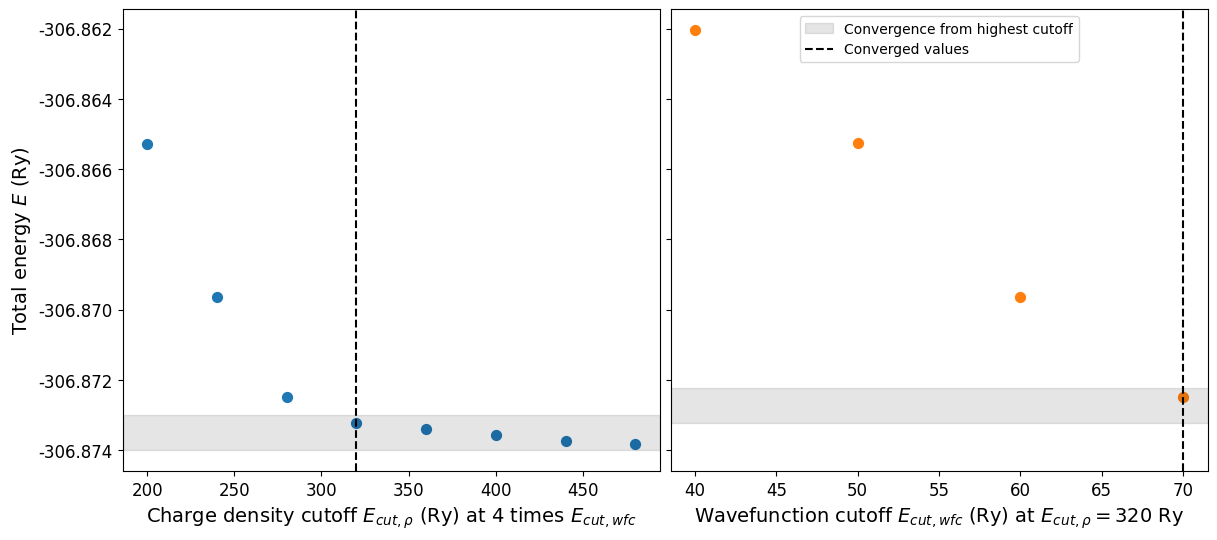

In [10]:
a,ax1 = plt.subplots(1,2,sharex=False,sharey=True,num=None,figsize=(14,6),facecolor='w',edgecolor='k')
a.subplots_adjust(wspace=0.02)

ax1[0].axvline(x=320,color='k',ls='--')
ax1[0].scatter(i_rhocut_energies[:,0],i_rhocut_energies[:,1],s=50)
ax1[0].set_ylabel(r'Total energy $E$ (Ry)',fontsize=14)
ax1[0].set_xlabel(r'Charge density cutoff $E_{cut,\rho}$ (Ry) at 4 times $E_{cut,wfc}$',fontsize=14)
ax1[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax1[0].axhspan(-306.874,-306.873,color='black',alpha=0.1)

ax1[1].scatter(i_wfclower_energies[3:,0],i_wfclower_energies[3:,1],color='#ff7f0e',s=50)
ax1[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# ax1[1].set_ylabel(r'Total energy $E$ (Ry)',fontsize=14)
ax1[1].set_xlabel(r'Wavefunction cutoff $E_{cut,wfc}$ (Ry) at $E_{cut,\rho}=320$ Ry',fontsize=14)
ax1[1].axhspan(-306.87323373,-306.87223373,color='black',alpha=0.1,label='Convergence from highest cutoff')
ax1[1].axvline(x=70,color='k',ls='--',label='Converged values')

for i in np.arange(2):
  # ax1[i].axvspan(xmin=69.3,xmax=70.7,color='black',alpha=0.1)
  # ax1[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
  ax1[i].tick_params(axis='both', which='major', labelsize=12)

ax1[1].legend(loc='upper center')
a.savefig('figures/i_scf_convergence.png',bbox_inches='tight')

## II. `smearing`

In [5]:
rawdat_smearing = np.loadtxt('smearing/energies_smearing.dat') 

# energy vs. smearing for kmesh (16,16,12)
en_vs_smearing = []
for i in range(7):
    en_vs_smearing.append(rawdat_smearing[3+11*i])
en_vs_smearing = np.array(en_vs_smearing) # [smearing parameter, kptmult, energy] for a single value 
smearing = en_vs_smearing[:,0]
energy = en_vs_smearing[:,2] # kpt 12,12,8

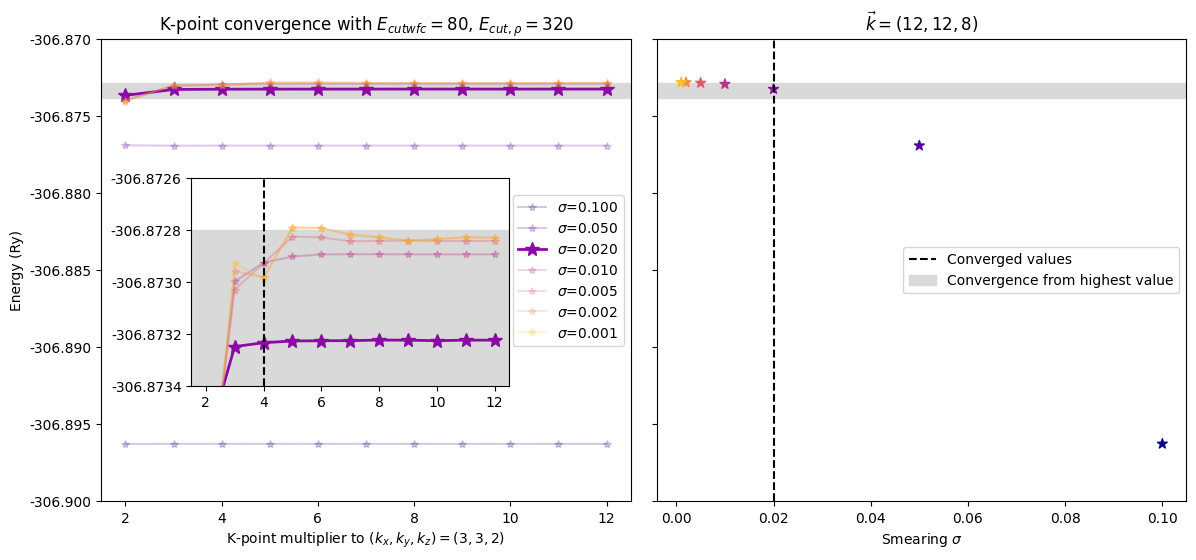

In [15]:
rangelist = np.arange(7)
rangespec = np.arange(2,7) 

c,cx = plt.subplots(1,2,sharey=True,num=None,figsize=(14,6),facecolor='w',edgecolor='k')
c.subplots_adjust(wspace=0.05)

# energy vs. smearing
cx[1].set_title(r'$\vec{k}=(12,12,8)$')
# cx[1].axhspan(-306.8738,-306.8728,color='#D9D9D9')
cx[1].axvline(x=0.02,color='k',ls='--',label='Converged values')
cx[1].axhspan(-306.8738,-306.8728,color='#D9D9D9',label='Convergence from highest value')
cx[1].scatter(smearing,energy,s=55,marker='*',color=cm.plasma(rangelist/len(rangelist)))
cx[1].set_ylim(-306.9,-306.870)
cx[1].set_xlabel(r'Smearing $\sigma$')
cx[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
cx[1].legend(loc='center right')

# k-point convergence
for iind,i in enumerate(rangelist):
    # Corrected runs (with up to kpt 12)
    smearmean = np.mean(rawdat_smearing[11*i:11*(i+1),0])
    kptlist = rawdat_smearing[11*i:11*(i+1),1]
    enlist = rawdat_smearing[11*i:11*(i+1),2]
    # print(i,i+11,smearmean)
    if i!=2:
      cx[0].plot(kptlist,enlist,label=r'$\sigma$=%.3f'%smearmean,color=cm.plasma(iind/len(rangelist)),marker='*',alpha=0.2)
    else:
      cx[0].plot(kptlist,enlist,label=r'$\sigma$=%.3f'%smearmean,color=cm.plasma(iind/len(rangelist)),marker='*',linewidth=2,markersize=10)
cx[0].legend()
cx[0].set_title(r'K-point convergence with $E_{cutwfc}=80$, $E_{cut,\rho}=320$')
# plt.ylabel('Energy (Ry)')
cx[0].set_xlabel(r'K-point multiplier to $(k_x,k_y,k_z)=(3,3,2)$')
cx[0].axhspan(-306.8738,-306.8728,color='#D9D9D9')
cx[0].set_ylabel('Energy (Ry)')

# # zoom in on last three values of smearing
cx1in = cx[0].inset_axes([0.17,0.25,0.6,0.45])
for jind,j in enumerate(rangespec):
    kptlist = rawdat_smearing[11*j:11*(j+1),1]
    enlist = rawdat_smearing[11*j:11*(j+1),2]
    if j!=2:
      cx1in.plot(kptlist,enlist,color=cm.plasma((jind+2)/len(rangelist)),marker='*',alpha=0.3)
    else:
      cx1in.plot(kptlist,enlist,color=cm.plasma((jind+2)/len(rangelist)),marker='*',linewidth=2,markersize=10)
cx1in.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
cx1in.axhspan(-306.8738,-306.8728,color='#D9D9D9')
cx1in.axvline(x=4,color='k',ls='--')
cx1in.set_ylim(-306.8734,-306.8726)

c.savefig('figures/ii_smearing.png',bbox_inches='tight')

## III. `vcrelax`

In [16]:
## experimental data
celldm1 = 6.2531037 # user-defined cell parameter a, to normalize in bohr
celldm3 = 1.594 # user-defined c/a
cexpt = celldm1 * celldm3 

# x-axis data (ecutwfc)
ecutwfc = np.arange(50,130,10)
ecutrho = 4*ecutwfc
ecutwfc_lower = np.arange(40,100,10)

# ecutwfc convergence data
iii_conv_en = np.loadtxt('vcrelax/iii_vcrelax_energies_clean.dat') # energy
iii_conv_vol = np.loadtxt('vcrelax/iii_vols_clean.dat') # volume
iii_conv_cparam_a = np.loadtxt('vcrelax/iii_cparams_a.dat') * celldm1 # a
iii_conv_cparam_ca = np.loadtxt('vcrelax/iii_cparams_ca.dat') * celldm1 # c/a
iii_conv_pres = np.abs(np.loadtxt('vcrelax/iii_vcrelax_pressures_clean.dat'))

# wfcut-lowering data
iii_conv_lowerwfc_a = np.append(np.loadtxt('vcrelax/wfclower90/iii_wfclow_cparams_a.dat')*celldm1,iii_conv_cparam_a[4])
iii_conv_lowerwfc_ca = np.append(np.loadtxt('vcrelax/wfclower90/iii_wfclow_cparams_ca.dat')*celldm1,iii_conv_cparam_ca[4]) 
iii_conv_lowerwfc_en = np.append(np.loadtxt('vcrelax/wfclower90/iii_wfclow_energies_clean.dat'),iii_conv_en[4])

# kpt convergence data
kptmult = np.arange(1,13,1)
kpt_cparams_a = np.loadtxt('vcrelax/kptconv/kptconv_cparams_a.dat') * celldm1
kpt_cparams_ca = np.loadtxt('vcrelax/kptconv/kptconv_cparams_ca.dat') * celldm1
kpt_pressures = np.abs(np.loadtxt('vcrelax/kptconv/kptconv_pressures_clean.dat'))
kpt_en = np.loadtxt('vcrelax/kptconv/kptconv_energies_clean.dat')

### pressure, volume

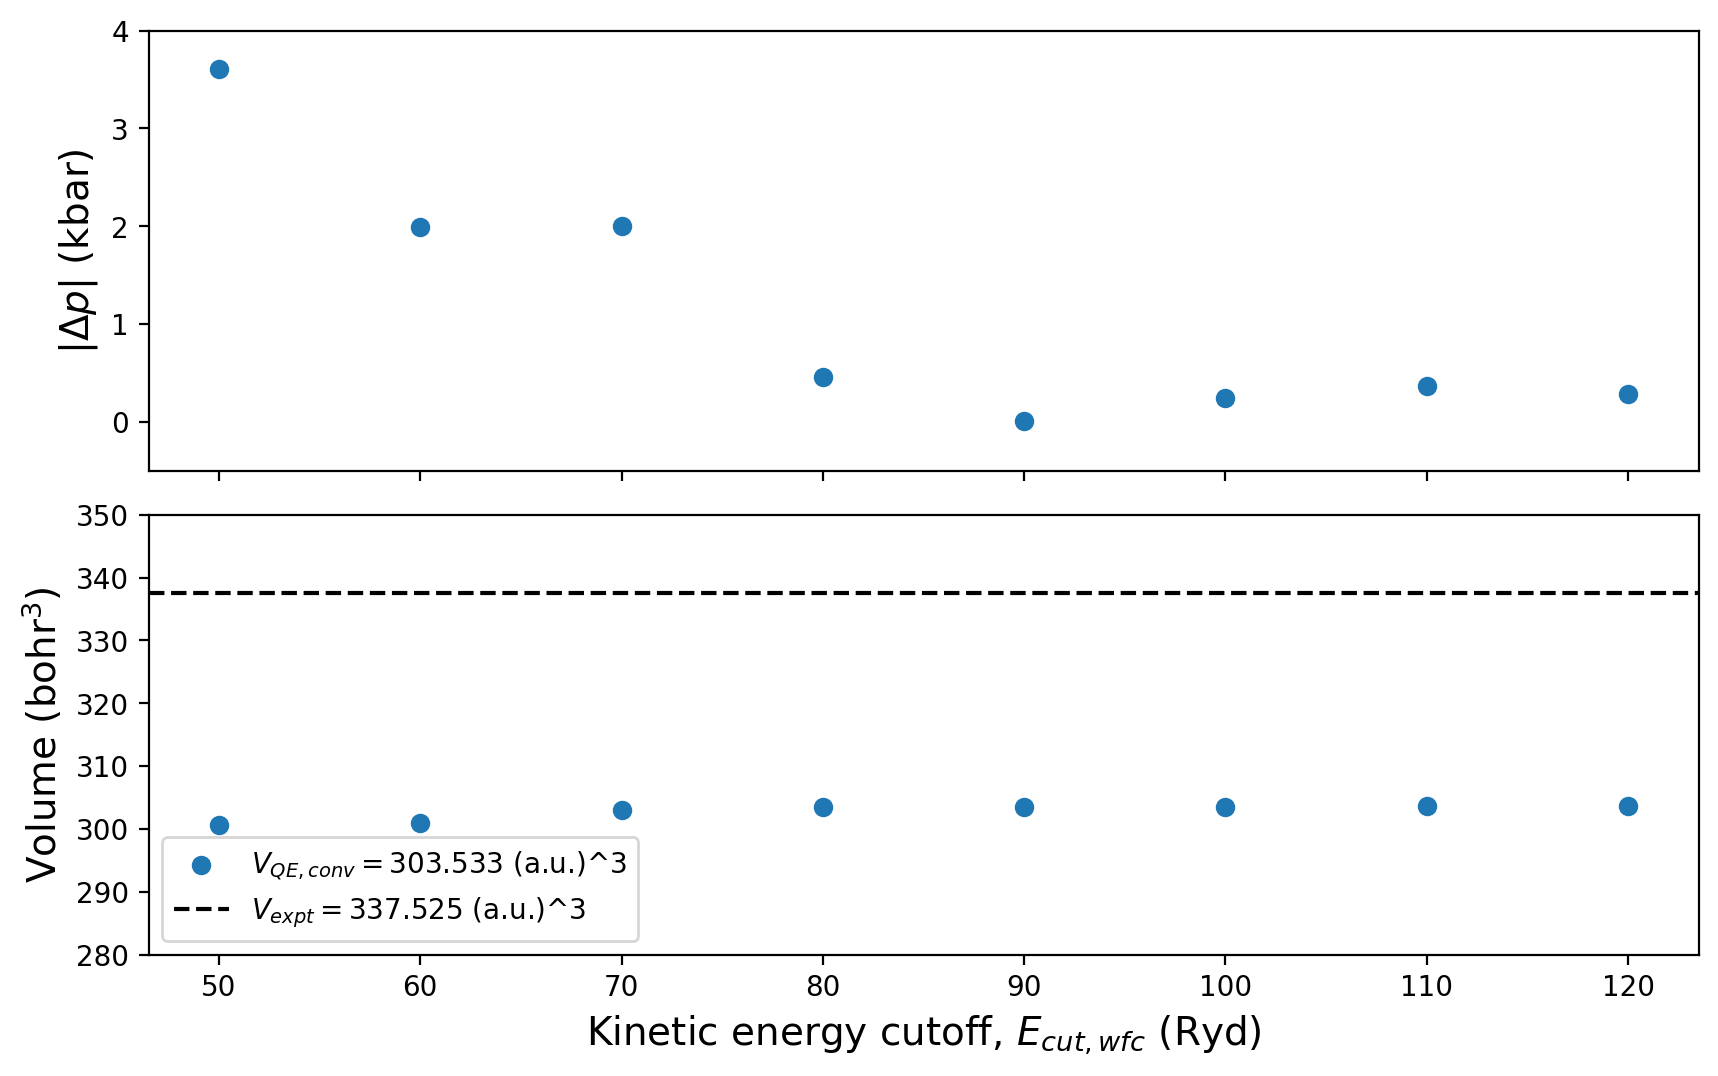

In [18]:
d,dax = plt.subplots(2,1,sharex=True,sharey=False,num=None,figsize=(10,6),dpi=200,facecolor='w',edgecolor='k')
d.subplots_adjust(hspace=0.1)

dax[0].scatter(ecutwfc,iii_conv_pres)
dax[0].set_ylabel(r'$|\Delta p|$ (kbar)',fontsize=14)
dax[0].set_ylim(-0.5,4)


dax[1].scatter(ecutwfc,iii_conv_vol,label=r'$V_{QE,conv}=%.3f$ (a.u.)^3'%iii_conv_vol[3])
dax[1].set_ylabel(r'Volume $($bohr$^3)$',fontsize=14)
dax[1].set_xlabel(r'Kinetic energy cutoff, $E_{cut,wfc}$ (Ryd)',fontsize=14)
dax[1].axhline(y=337.5249,color='k',ls='--',label=r'$V_{expt}=%.3f$ (a.u.)^3'%(337.5249))
dax[1].legend()
dax[1].set_ylim(280,350)
d.savefig('figures/iii_vcr_pV.png',bbox_inches='tight')

### rhocutoff convergence at ecutrho = 4*wfcutoff

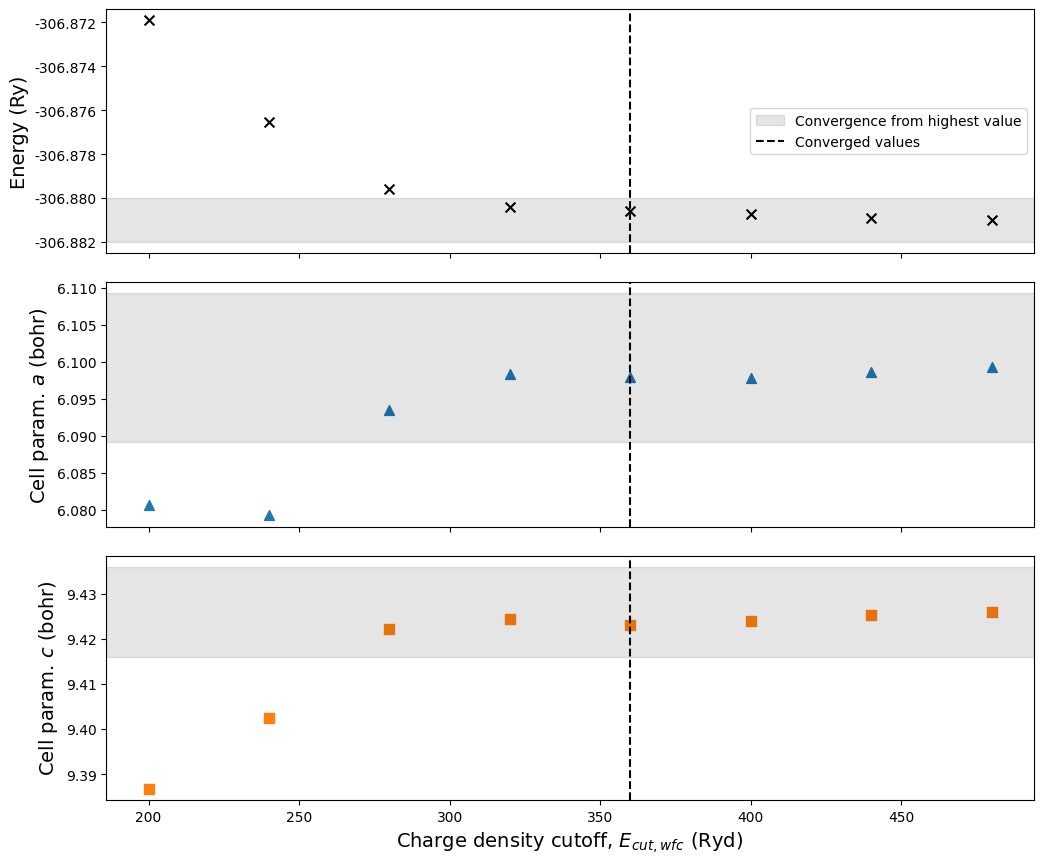

In [19]:
## Charge density cutoff
f,axes = plt.subplots(3,1,sharex=True,sharey=False,num=None,figsize=(10,8.5),dpi=100,facecolor='w',edgecolor='k')
f.subplots_adjust(hspace=0.05)
f.tight_layout(rect=[0, 0, 1, 1])


# energy
axes[0].scatter(ecutrho,iii_conv_en,s=50,marker='x',color='black')
axes[0].set_ylabel(r'Energy (Ry)',fontsize=14)
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].axhspan(iii_conv_en[-1]-1e-3,iii_conv_en[-1]+1e-3,color='k',alpha=0.1,label='Convergence from highest value')

# a
axes[1].scatter(ecutrho,iii_conv_cparam_a,s=50,marker='^',color='#1f77b4',label='QE')
axes[1].set_ylabel(r'Cell param. $a$ (bohr)',fontsize=14)
axes[1].axhspan(iii_conv_cparam_a[-1]-0.01,iii_conv_cparam_a[-1]+0.01,color='k',alpha=0.1)

# c
axes[2].scatter(ecutrho,iii_conv_cparam_ca,s=50,marker='s',label=r'QE',color='#ff7f0e')
axes[2].set_ylabel(r'Cell param. $c$ (bohr)',fontsize=14)
axes[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[2].axhspan(iii_conv_cparam_ca[-1]-0.01,iii_conv_cparam_ca[-1]+0.01,color='k',alpha=0.1)
axes[2].set_xlabel(r'Charge density cutoff, $E_{cut,wfc}$ (Ryd)',fontsize=14)

for ax in axes:
  ax.axvline(360,color='k',ls='--',label='Converged values')
axes[0].legend(loc='center right')

f.savefig('figures/iii_vcr_ecutwfc.png',bbox_inches='tight')

### wfcutoff convergence at ecutrho = 360 

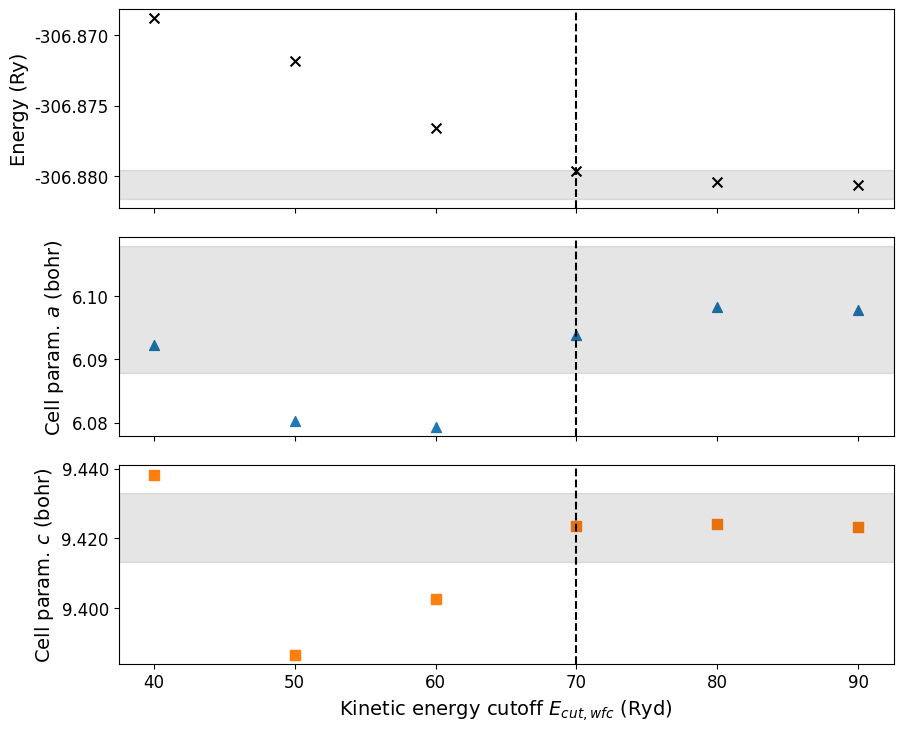

In [10]:
## Finding wavefunction cutoff at Ecutrho = 360
g,axes2 = plt.subplots(3,1,sharex=True,sharey=False,num=None,figsize=(10,8.5),dpi=100,facecolor='w',edgecolor='k')
g.subplots_adjust(hspace=0.15)
# g.tight_layout(rect=[0, 0, 1, 1])
axes2[0].scatter(ecutwfc_lower,iii_conv_lowerwfc_en,s=50,marker='x',color='black')
axes2[0].set_ylabel(r'Energy (Ry)',fontsize=14)
axes2[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes2[0].axhspan(iii_conv_lowerwfc_en[-1]-1e-3,iii_conv_lowerwfc_en[-1]+1e-3,color='k',alpha=0.1)

axes2[1].scatter(ecutwfc_lower,iii_conv_lowerwfc_a,s=50,marker='^',color='#1f77b4',label='QE')
axes2[1].set_ylabel(r'Cell param. $a$ (bohr)',fontsize=14)
# axes2[1].axhline(y=celldm1,ls='--',color='black',label=r'$a_{expt}=%.3f$'%celldm1)
axes2[1].axhspan(iii_conv_lowerwfc_a[-1]-0.01,iii_conv_lowerwfc_a[-1]+0.01,color='k',alpha=0.1)

axes2[2].scatter(ecutwfc_lower,iii_conv_lowerwfc_ca,s=50,marker='s',color='#ff7f0e',label='QE')
axes2[2].set_ylabel(r'Cell param. $c$ (bohr)',fontsize=14)
axes2[2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes2[2].set_xlabel('Kinetic energy cutoff $E_{cut,wfc}$ (Ryd)',fontsize=14)
axes2[2].axhspan(iii_conv_lowerwfc_ca[-1]-0.01,iii_conv_lowerwfc_ca[-1]+0.01,color='k',alpha=0.1)
# axes2[2].axhline(y=cexpt,ls='--',color='black',label=r'$c_{expt}=%.3f$'%cexpt)

for i in np.arange(len(axes2)):
  axes2[i].axvline(70,color='k',ls='--')
  axes2[i].tick_params(axis='both', which='major', labelsize=12)

g.savefig('figures/iii_vcr_lower90.png',bbox_inches='tight')

### kpt convergence

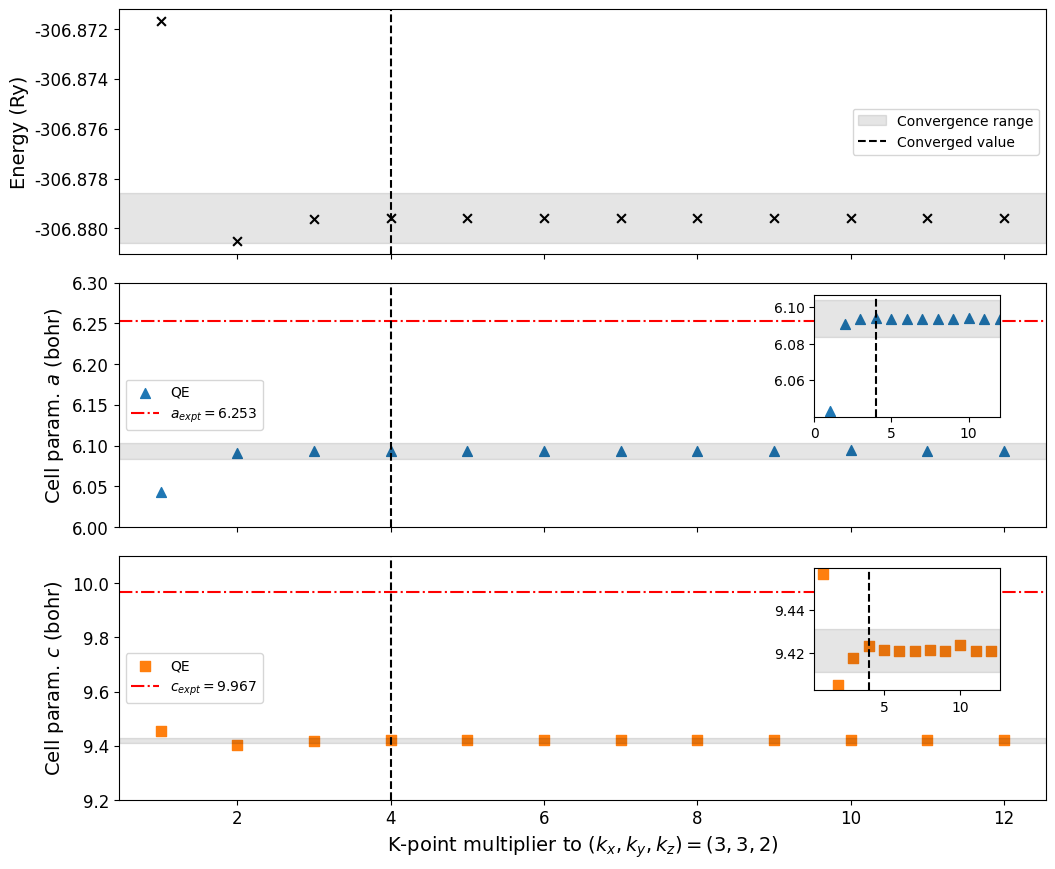

In [22]:
h,axes3 = plt.subplots(3,1,sharex=True,sharey=False,num=None,figsize=(10,8.5),dpi=100,facecolor='w',edgecolor='k')
h.subplots_adjust(hspace=0.05)
# h.suptitle(r'K-point convergence for $E_{cut,wfc}=70, E_{cut,\rho}=360$',fontsize=15)
h.tight_layout(rect=[0, 0, 1, 1])
axesbox = [0.75,0.45,0.2,0.5]

# energy
axes3[0].scatter(kptmult,kpt_en,s=40,marker='x',color='k')
axes3[0].set_ylabel(r'Energy (Ry)',fontsize=14)
axes3[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes3[0].axhspan(kpt_en[-1]-0.001,kpt_en[-1]+0.001,color='k',alpha=0.1,label='Convergence range')

# a
axes3[1].scatter(kptmult,kpt_cparams_a,s=50,marker='^',color='#1f77b4',label='QE')
axes3[1].set_ylabel(r'Cell param. $a$ (bohr)',fontsize=14)
axes3[1].axhspan(kpt_cparams_a[-1]-0.01,kpt_cparams_a[-1]+0.01,color='k',alpha=0.1)
axes3[1].axhline(y=celldm1,ls='-.',color='red',label=r'$a_{expt}=%.3f$'%celldm1)
axes3[1].set_ylim(6,6.3)
axes31in = axes3[1].inset_axes(axesbox)
axes31in.scatter(kptmult,kpt_cparams_a,s=50,marker='^',color='#1f77b4')
axes31in.axvline(4,color='k',ls='--')
axes31in.axhspan(kpt_cparams_a[-1]-0.01,kpt_cparams_a[-1]+0.01,color='k',alpha=0.1)
axes31in.set_xlim(0,12)
axes3[1].legend(loc='center left')

# c
axes3[2].scatter(kptmult,kpt_cparams_ca,s=50,marker='s',color='#ff7f0e',label='QE')
axes3[2].set_ylabel(r'Cell param. $c$ (bohr)',fontsize=14)
axes3[2].axhline(y=cexpt,ls='-.',color='red',label=r'$c_{expt}=%.3f$'%cexpt)
axes3[2].axhspan(kpt_cparams_ca[-1]-0.01,kpt_cparams_ca[-1]+0.01,color='k',alpha=0.1)
axes3[2].set_ylim(9.2,10.1)
axes32in = axes3[2].inset_axes(axesbox)
axes32in.scatter(kptmult,kpt_cparams_ca,s=50,marker='s',color='#ff7f0e')
axes32in.axvline(4,color='k',ls='--')
axes32in.axhspan(kpt_cparams_ca[-1]-0.01,kpt_cparams_ca[-1]+0.01,color='k',alpha=0.1)
axes3[2].legend(loc='center left')
axes3[2].set_xlabel(r'K-point multiplier to $(k_x,k_y,k_z)=(3,3,2)$',fontsize=14)
for i in np.arange(len(axes3)):
  axes3[i].axvline(4,color='k',ls='--',label='Converged value')
  axes3[i].tick_params(axis='both', which='major', labelsize=12)
axes3[0].legend(loc='center right')

h.savefig('figures/iii_vcr_kpt.png',bbox_inches='tight')

## IV. Phonon calculations

In [11]:
## data 
# visual estimate: https://sissa-my.sharepoint.com/:p:/g/personal/atan_sissa_it/Ecr1zXtbTHdEpu-C0Lr11nsBlCZPo7q41tDMKPDdx15qJQ?e=vAi73Q

freq_expt = np.array([0, 0, 0, 138.8557464, 138.8557464, 226.1254195]) * 0.03 # estimated from Pleschiutschnig1991
frequencies = [r"$f_{%i}$"%freqval for freqval in np.arange(4,7)] # frequency labels; optical modes only

iva_wfc = np.loadtxt('phonon/convergence/1wfc/iva_conv_clean.dat').reshape((8,6)).T * 0.03
ivb_wfc = np.loadtxt('phonon/convergence/2wfclow/ivb_conv_clean.dat').reshape((4,6)).T * 0.03
ivc_kpt = np.loadtxt('phonon/convergence/3kpt/ivc_conv_clean.dat').reshape((11,6)).T * 0.03

arr2concat = np.expand_dims(iva_wfc[:,3],axis=0).T # ecutwfc=80, modifying dimensions and transposing to allow transposition in ivb_conv plot
ivb_wfc = np.concatenate((ivb_wfc,arr2concat),axis=1)

wfcax = np.arange(50,130,10)
wfcbx = np.arange(40,90,10)
kptx = np.arange(1,12) # not (1,13) because kpt12 had a negative S matrix

### Convergence tests

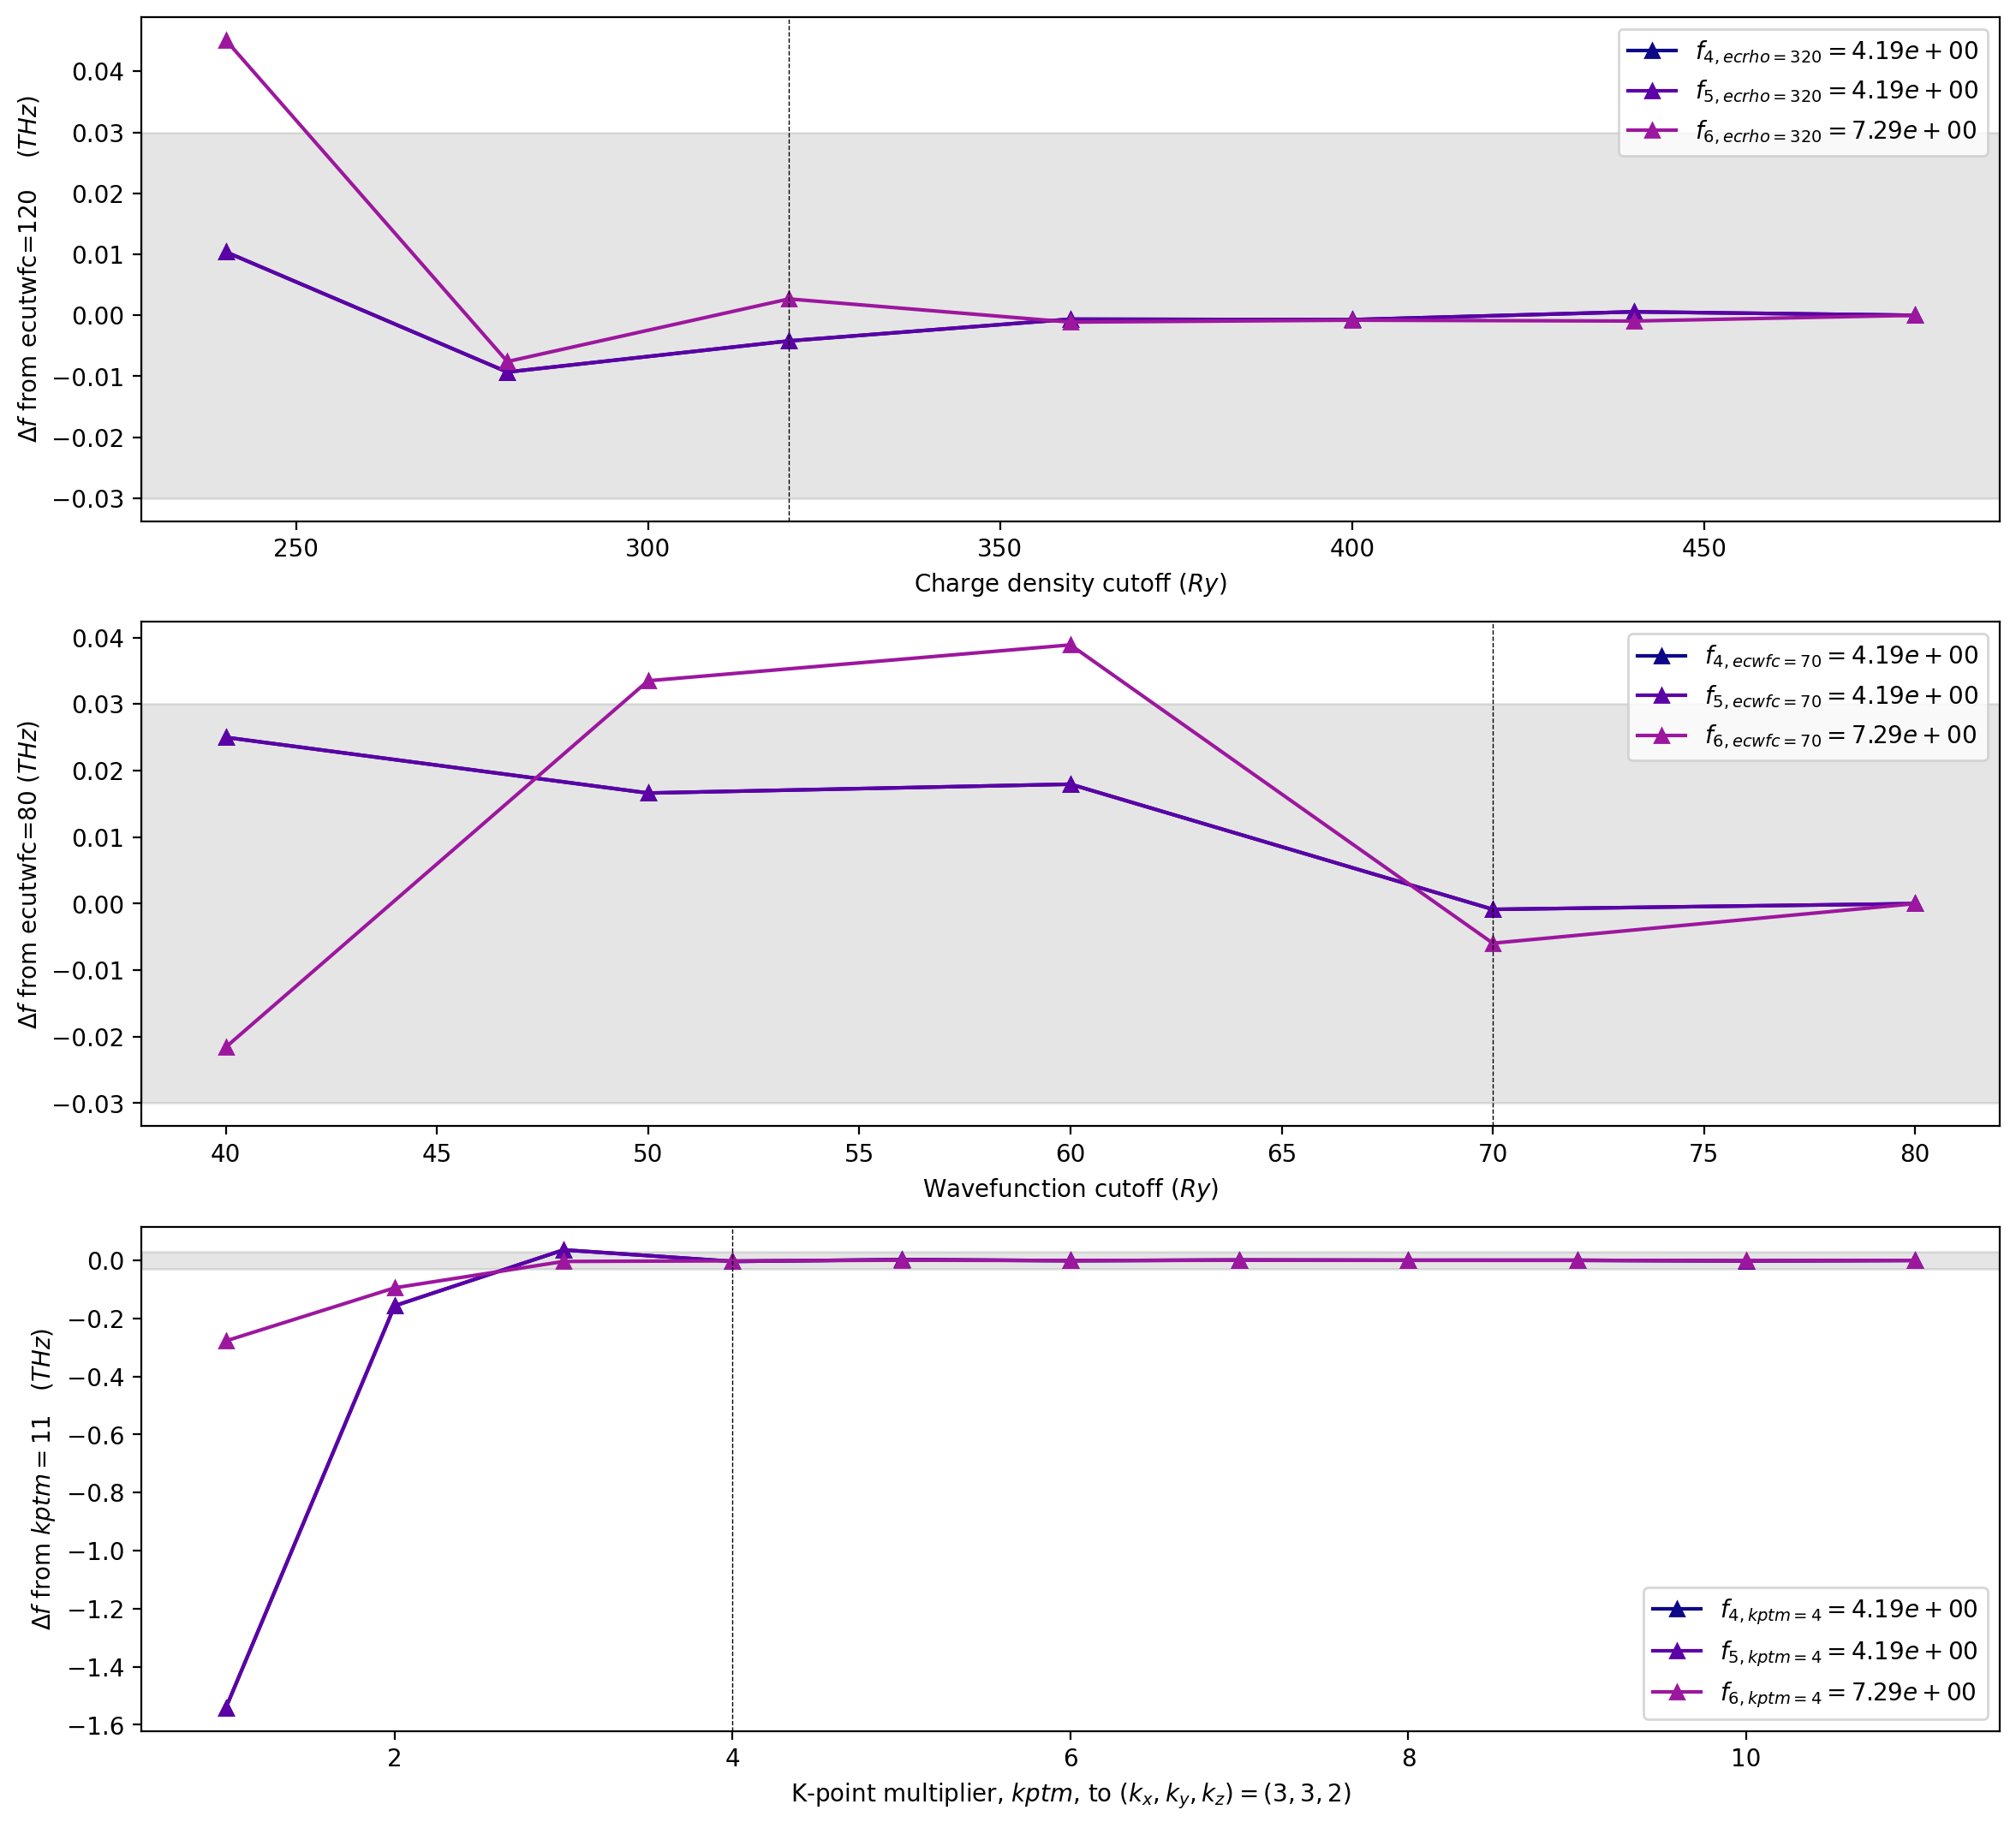

In [4]:
ivconv,ivc_ax = plt.subplots(3,1,sharex=False,sharey=False,figsize=(14,13),dpi=200,facecolor='w',edgecolor='k')

for i,freq in enumerate(iva_wfc[3:,1:]): # wfcut=50 has wild values
    ivc_ax[0].plot(wfcax[1:]*4,freq-freq[-1],label=r'$f_{%i,ecrho=320}=%.2e$'%(i+4,freq[3]),color=cm.plasma(i/len(iva_wfc)),marker='^')
ivc_ax[0].axvline(320,color='k',ls='--',lw='0.5')
# ivc_ax[0].set_ylim(-3,3)
ivc_ax[0].set_ylabel(r'$\Delta f$ from ecutwfc=120 $\quad(THz)$')
ivc_ax[0].set_xlabel(r'Charge density cutoff ($Ry$)')
ivc_ax[0].axhspan(-0.03,0.03,color='k',alpha=0.1)
ivc_ax[0].legend()

for i,freq in enumerate(ivb_wfc[3:]):
    ivc_ax[1].plot(wfcbx,freq-freq[-1],label=r'$f_{%i,ecwfc=70}=%.2e$'%(i+4,freq[-1]),color=cm.plasma(i/len(ivb_wfc)),marker='^')
ivc_ax[1].set_ylabel(r'$\Delta f$ from ecutwfc=80 $(THz)$')
ivc_ax[1].set_xlabel(r'Wavefunction cutoff $(Ry)$')
# ivc_ax[1].set_ylim(-3,3)
ivc_ax[1].axvline(70,color='k',ls='--',lw=0.5)
ivc_ax[1].axhspan(-0.03,0.03,color='k',alpha=0.1)
ivc_ax[1].legend()

for i,freq in enumerate(ivc_kpt[3:]):
    ivc_ax[2].plot(kptx,freq-freq[-1],label=r'$f_{%i,kptm=4}=%.2e$'%(i+4,freq[-1]),color=cm.plasma(i/len(ivc_kpt)),marker='^') # freq[-1] is 
ivc_ax[2].set_ylabel(r'$\Delta f$ from $kptm=11 \quad(THz)$')
ivc_ax[2].set_xlabel(r'K-point multiplier, $kptm$, to $(k_x,k_y,k_z)=(3,3,2)$')
# ivc_ax[2].set_ylim(-2,2)
ivc_ax[2].axhspan(-0.03,0.03,color='k',alpha=0.1)
ivc_ax[2].axvline(4,color='k',ls='--',lw=0.5)
ivc_ax[2].legend()

ivconv.savefig('figures/iv_conv.png',bbox_inches='tight')

### Phonon values

In [12]:
# Estimations from Ples1991
specialk_expt = np.empty((4,6)) # rows in order are gG,K,M,A
specialk_expt[0] = freq_expt
specialk_expt[1] = np.array([181.601162788,183.537209302,183.537209302,183.537209302,207.544186047,213.739534884]) * 0.03
specialk_expt[2] = np.array([121.5837209302326,132.8127906976744,202.1232558139535,211.4162790697674,212.5779069767442,224.1941860465116]) * 0.03
specialk_expt[3] = np.array([0,0,0,98.35116,158.3686,158.3686]) * 0.03

# Data from calculations 
specialk_qe = np.loadtxt('phonon/specialk/ivd_clean.dat').reshape((4,6)) * 0.03

# Don't include acoustic (lowest 3) modes. Error is high.

specialk_expt = specialk_expt[:,-3:]
specialk_qe = specialk_qe[:,-3:]

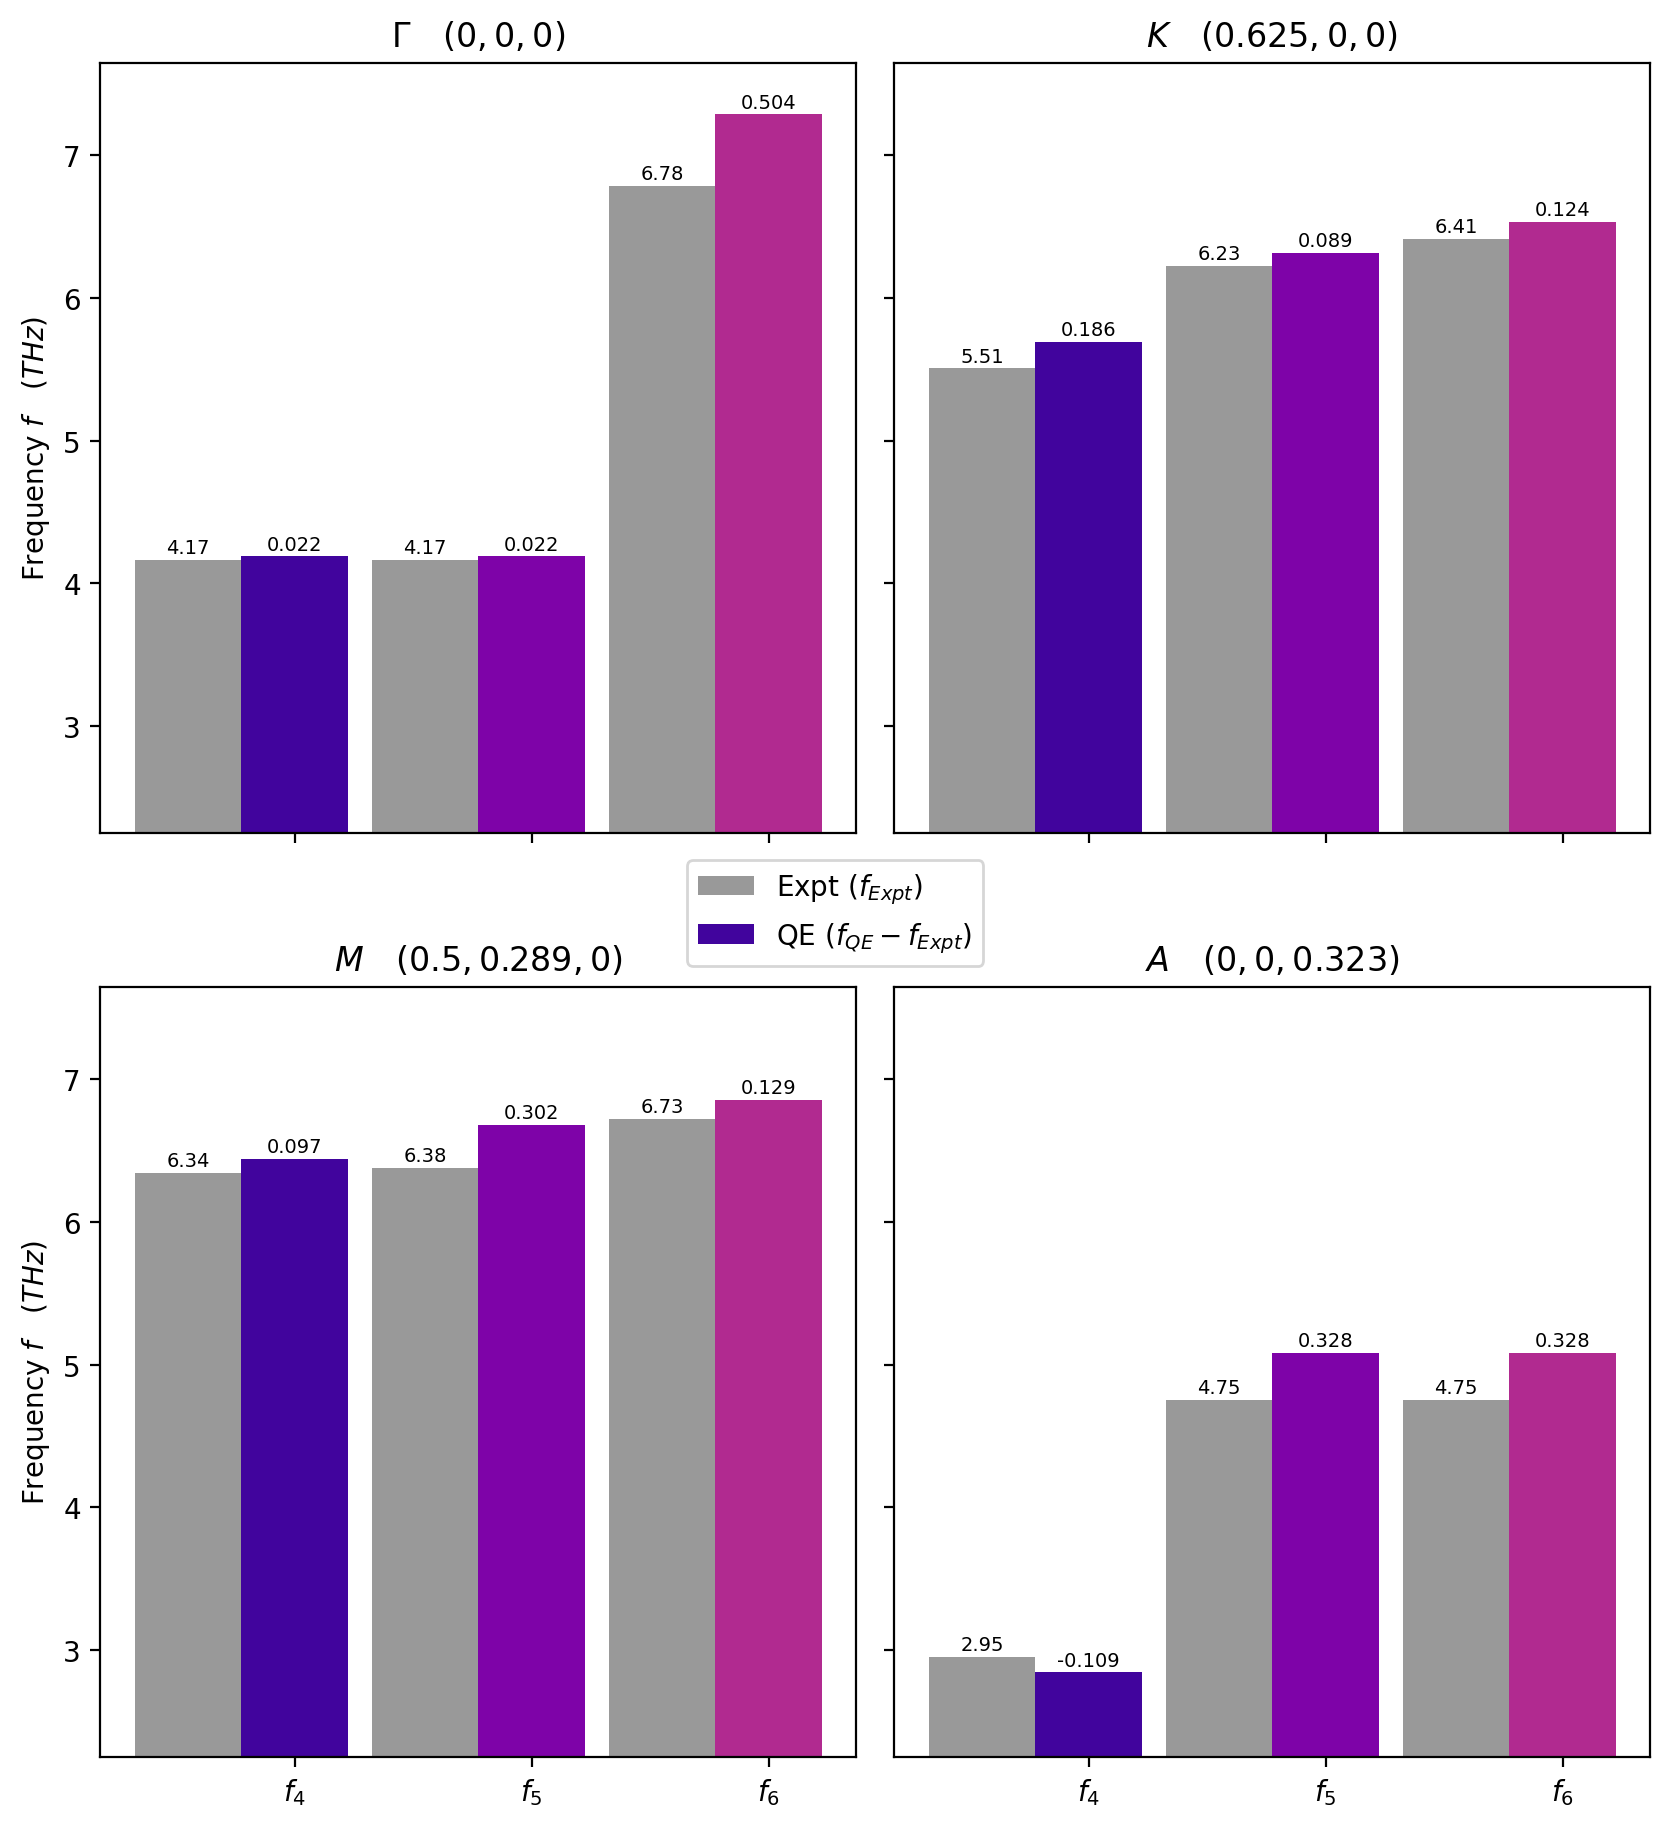

In [13]:
# bar graph parameters
x = np.arange(3) # not 6; acoustic modes not included. 
width =0.45
offset = 0
freq_round = np.round(freq_expt,2) # for labeling expt frequency values 
spec_k_name = [r'$\Gamma\quad(0,0,0)$',r'$K\quad(0.625,0,0)$',r'$M\quad(0.5,0.289,0)$',r'$A\quad(0,0,0.323)$']

ivphon,ivp_ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,11),dpi=200,facecolor='w',edgecolor='k')
ivphon.subplots_adjust(hspace=0.2,wspace=0.05)
ivp_ax[0,0].set_ylabel(r'Frequency $f\quad(THz)$')
ivp_ax[1,0].set_ylabel(r'Frequency $f\quad(THz)$')


for i,ax in enumerate(ivp_ax.flat):
    abs_error = np.round(specialk_qe[i]-specialk_expt[i],3) # absolute deviation of kptm=4 (converged) from experimental values 
    # err_label=['+'+str(j) if ind>2 else str(j) for ind,j in enumerate(abs_error)]
    err_label=[str(j) for ind,j in enumerate(abs_error)]
    freq_round = np.round(specialk_expt[i],2)
    
    ax.set_title(spec_k_name[i])
    if i==0:
        rect2 = ax.bar(x + offset, specialk_expt[i], width, label=r'Expt $(f_{Expt})$',color='k',alpha=0.4)
        rect1 = ax.bar(x + width, specialk_qe[i], width, label=r'QE $(f_{QE}-f_{Expt})$',color=cm.plasma(0.1+0.9*np.arange(6)/6))
    else:
        rect2 = ax.bar(x + offset, specialk_expt[i], width, color='k',alpha=0.4)
        rect1 = ax.bar(x + width, specialk_qe[i], width, color=cm.plasma(0.1+0.9*np.arange(6)/6))        
    ax.bar_label(rect1, labels=err_label, label_type='edge',padding=1,fontsize=7) # deviation from experiment
    ax.bar_label(rect2, labels=freq_round, label_type='edge',padding=1,fontsize=7)
    ax.set_xticks(x + width, frequencies)
    ax.axhline(0,color='k')
    ax.set_ylim(75*0.03,255*0.03) # don't plot acoustic nodes 
# ivp_ax[0,0].text(1,225,': $f_{Expt}$\n\n: $f_{QE}-f_{Expt}$',fontsize=7)
ivphon.legend(loc='center')   

ivphon.savefig('figures/iv_phon.png',bbox_inches='tight')

## scratch region

In [16]:
# convergence data (absolute deviations from experimental values 
iva_abs_error = np.round(np.array(freq_expt)-np.array(iva_wfc[:,3]),3) # absolute deviation of ecutrho=320 (converged) from experimental values 
ivb_abs_error = np.round(np.array(freq_expt)-np.array(ivb_wfc[:,-2]),3) # absolute deviation of ecutrho=320 (converged) from experimental values 
ivc_abs_error = np.round(np.array(freq_expt)-np.array(ivc_kpt[:,3]),3) # absolute deviation of kptm=4 (converged) from experimental values 

### rhocutoff convergence at ecutrho = 4*ecutwfc

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (6,).

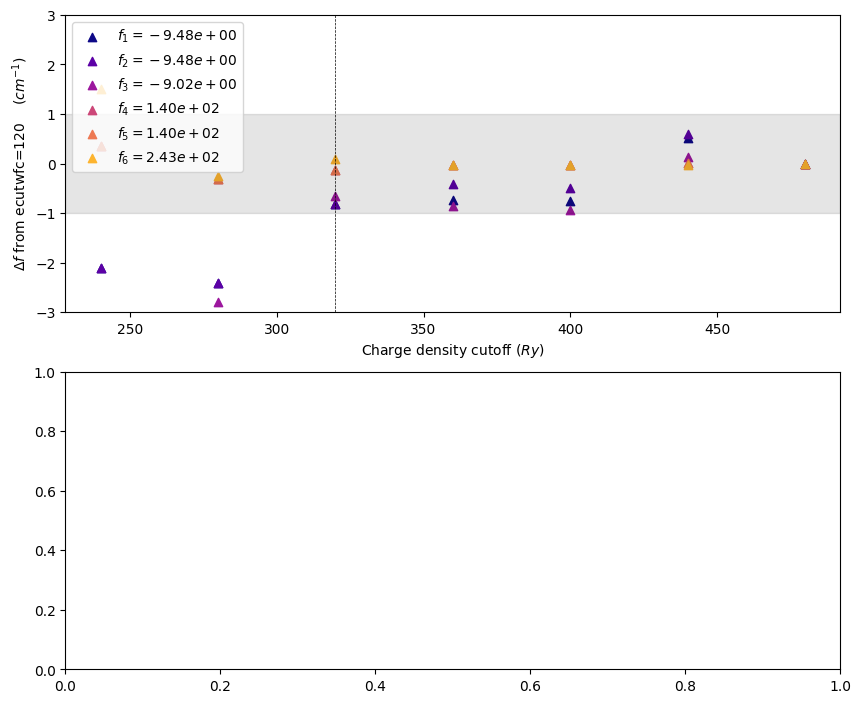

In [17]:
iva_f,iva_ax = plt.subplots(2,1,sharex=False,sharey=False,num=None,figsize=(10,8.5),dpi=100,facecolor='w',edgecolor='k')

for i,freq in enumerate(iva_wfc[:,1:]): # wfcut=50 has wild values
    iva_ax[0].scatter(wfcax[1:]*4,freq-freq[-1],label=r'$f_{%i}=%.2e$'%(i+1,freq[-1]),color=cm.plasma(i/len(iva_wfc)),marker='^')
iva_ax[0].axvline(320,color='k',ls='--',lw='0.5')
iva_ax[0].set_ylim(-3,3)
iva_ax[0].set_ylabel(r'$\Delta f$ from ecutwfc=120 $\quad(THz)$')
iva_ax[0].set_xlabel(r'Charge density cutoff ($Ry$)')
iva_ax[0].axhspan(-0.03,0.03,color='k',alpha=0.1)
iva_ax[0].legend()

rect1 = iva_ax[1].bar(x, iva_wfc[:,3], width, label='QE',color=cm.plasma(np.arange(6)/6))
rect2 = iva_ax[1].bar(x + width, freq_expt, width, label='Expt',color='k',alpha=0.4)
iva_ax[1].bar_label(rect1, labels=iva_abs_error, label_type='edge',padding=1,fontsize=7)
iva_ax[1].set_ylabel(r'Frequency at ecutwfc=80 $f\quad(THz)$')
iva_ax[1].set_xticks(x + width, frequencies)
iva_ax[1].axhline(0,color='k')
iva_ax[1].text(0.5,225,r'Labels: $f_{Expt}-f_{QE}$')
iva_ax[1].legend()

iva_f.savefig('figures/iv_rhocutoff.png',bbox_inches='tight')

### wfcutoff convergence at ecutrho = 320

In [18]:
ivb_wfc,ivb_wfc[:,-2]

(array([[-10.619709,  -8.933205,  -9.75707 ,  -9.758149, -10.292785],
        [-10.619709,  -8.792685,  -9.75707 ,  -9.758149, -10.292785],
        [-10.59794 ,  -8.792685,  -9.373325,  -9.176485,  -9.678564],
        [140.493731, 140.214599, 140.258953, 139.63175 , 139.6604  ],
        [140.493731, 140.214599, 140.258953, 139.63175 , 139.6604  ],
        [242.425751, 244.261777, 244.441618, 242.946811, 243.145048]]),
 array([ -9.758149,  -9.758149,  -9.176485, 139.63175 , 139.63175 ,
        242.946811]))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (6,).

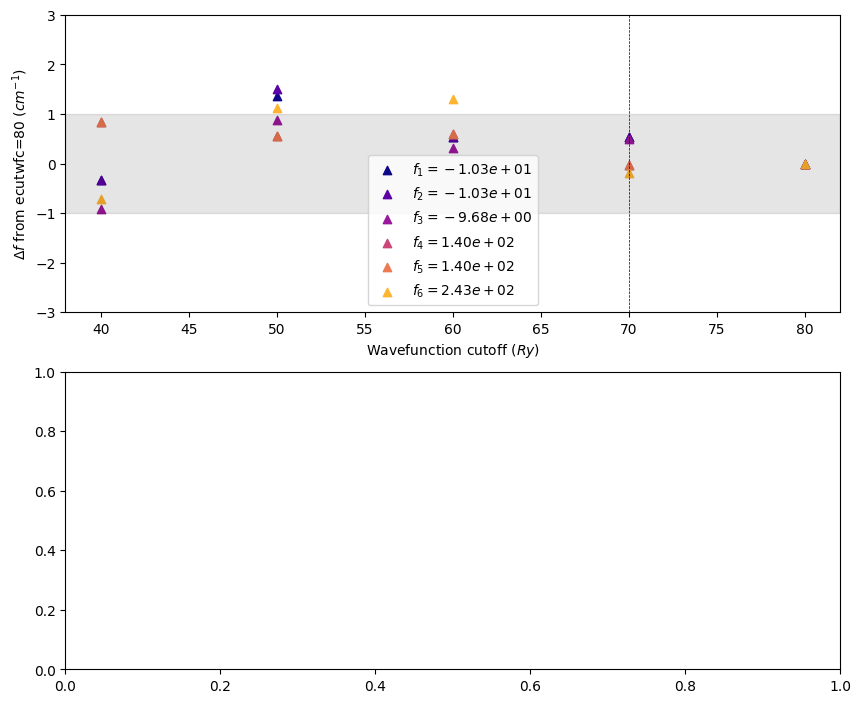

In [19]:
ivb_f,ivb_ax = plt.subplots(2,1,sharex=False,sharey=False,figsize=(10,8.5),dpi=100,facecolor='w',edgecolor='k')

for i,freq in enumerate(ivb_wfc):
    ivb_ax[0].scatter(wfcbx,freq-freq[-1],label=r'$f_{%i}=%.2e$'%(i+1,freq[-1]),color=cm.plasma(i/len(ivb_wfc)),marker='^')
ivb_ax[0].set_ylabel(r'$\Delta f$ from ecutwfc=80 $(THz)$')
ivb_ax[0].set_xlabel(r'Wavefunction cutoff $(Ry)$')
ivb_ax[0].set_ylim(-3,3)
ivb_ax[0].axvline(70,color='k',ls='--',lw=0.5)
ivb_ax[0].axhspan(-0.03,0.03,color='k',alpha=0.1)
ivb_ax[0].legend()

rect1 = ivb_ax[1].bar(x + offset, ivb_wfc[:,3], width, label='QE',color=cm.plasma(np.arange(6)/6))
rect2 = ivb_ax[1].bar(x + width, freq_expt, width, label='Expt',color='k',alpha=0.4)
ivb_ax[1].bar_label(rect1, labels=ivb_abs_error, label_type='edge',padding=1,fontsize=7)
ivb_ax[1].set_ylabel(r'Frequency $f\quad(THz)$')
ivb_ax[1].set_xticks(x + width, frequencies)
ivb_ax[1].axhline(0,color='k')
ivb_ax[1].text(0.5,225,r'Labels: $f_{Expt}-f_{QE}$')
ivb_ax[1].legend()

ivb_f.savefig('figures/iv_wfclower.png',bbox_inches='tight')

### kpt convergence

In [ ]:
ivc_f,ivc_ax = plt.subplots(2,1,sharex=False,sharey=False,figsize=(10,8.5),dpi=100,facecolor='w',edgecolor='k')

for i,freq in enumerate(ivc_kpt):
    ivc_ax[0].scatter(kptx,freq-freq[-1],label=r'$f_{%i}=%.2e$'%(i+1,freq[-1]),color=cm.plasma(i/len(ivc_kpt)),marker='^') # freq[-1] is 
ivc_ax[0].set_ylabel(r'$\Delta f$ from $kptm=11 \quad(THz)$')
ivc_ax[0].set_xlabel(r'K-point multiplier, $kptm$, to $(k_x,k_y,k_z)=(3,3,2)$')
ivc_ax[0].set_ylim(-2,2)
ivc_ax[0].axhspan(-0.03,0.03,color='k',alpha=0.1)
ivc_ax[0].axvline(4,color='k',ls='--',lw=0.5)
ivc_ax[0].legend()

rect1 = ivc_ax[1].bar(x + width, ivc_kpt[:,3], width, label='QE',color=cm.plasma(np.arange(6)/6))
rect2 = ivc_ax[1].bar(x + offset, freq_expt, width, label='Expt',color='k',alpha=0.4)
ivc_ax[1].bar_label(rect1, labels=ivc_abs_error, label_type='edge',padding=1,fontsize=7)
ivc_ax[1].set_ylabel(r'Frequency $f\quad(THz)$')
ivc_ax[1].set_xticks(x + width, frequencies)
ivc_ax[1].axhline(0,color='k')
ivc_ax[1].text(0.5,225,r'Labels: $f_{QE}-f_{expt}$')
ivc_ax[1].legend()

ivc_f.savefig('figures/iv_kpt.png',bbox_inches='tight')